<a href="https://colab.research.google.com/github/sim20223561/coursera-test/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

BostonHousing=pd.read_csv('/BostonHousing.csv')
BostonHousing.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
BostonHousing.shape


(506, 14)

In [55]:
BostonHousing.isnull().sum()*100/BostonHousing.shape[0]

,0
crim,0.000000
zn,0.000000
indus,0.000000
chas,0.000000
nox,0.000000
rm,0.988142
age,0.000000
dis,0.000000
rad,0.000000
tax,0.000000


missintg values GONE

In [56]:
BostonHousing['rm'].fillna(BostonHousing['rm'].mean(),inplace=True)

In [57]:
BostonHousing.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


NORMALIZED

In [58]:
from sklearn.preprocessing import MinMaxScaler

X = BostonHousing.drop('medv', axis=1)
y = BostonHousing['medv']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X = pd.DataFrame(X_normalized, columns=X.columns)
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


SPLOIT DATASET 70:30

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (354, 13)
X_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


TRAIN MODE L

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Predictions on training set:")
print(y_train_pred[:5])
print("\nPredictions on testing set:")
print(y_test_pred[:5])

Predictions on training set:
[25.27861065 23.6923981  22.15034352 21.24812713 16.81504669]

Predictions on testing set:
[28.63252461 36.48602086 15.4189334  25.39319615 18.85542687]


In [62]:
from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R²):", r2_train)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set Evaluation:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R²):", r2_test)

Training Set Evaluation:
Mean Squared Error (MSE): 22.591045097286145
R-squared (R²): 0.7429813753968332

Testing Set Evaluation:
Mean Squared Error (MSE): 21.59828867254208
R-squared (R²): 0.7101410361770542


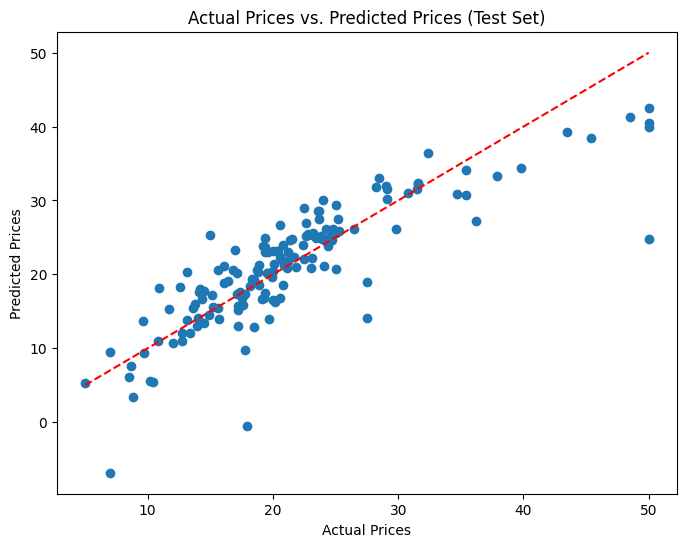

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices (Test Set)")

# Add a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()